In [3]:
import pandas as pd
import cdsapi
import atlite
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# df = pd.read_excel('CDS_Data_Validation\\2019-2023 Solar Profile SPP rev.xlsx', sheet_name = '2019-2023_Central',skiprows=4)
# df = df.merge(pd.read_excel('CDS_Data_Validation\\2019-2023 Solar Profile SPP rev.xlsx', sheet_name = '2019-2023_North',skiprows=4))

df = pd.read_excel('CDS_Data_Validation\\2019-2023 Wind Profile SPP rev2.xlsx', sheet_name = '2019-2023_Northeast',skiprows=6)
df['index_time'] = pd.to_datetime(df["REF"].dt.strftime('%Y-%m-%d-%H'))
df = df.drop(columns=['REF'])

### Resampling timestamp ###
df = df.groupby(by=["index_time"], dropna=False).mean()


### Making Per unit by Insatlled Capacity ###
# installed_capacity = [
#     34.2,
#     126.126,
#     73,
#     52,
#     128.396,
#     133.92
# ]

installed_capacity = [
    60
]

for i in range(len(df.columns)):
    df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]
    df[df.columns[i]] = df[df.columns[i]]/installed_capacity[i]

data_actual = df.copy()
print(data_actual.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43825 entries, 2019-01-01 00:00:00 to 2024-01-01 00:00:00
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WTB-N[WTB-N_GEN(MW)]  43825 non-null  float64
dtypes: float64(1)
memory usage: 684.8 KB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_31276\4110937527.py:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df.columns[i]].loc[df[df.columns[i]] > installed_capacity[i]] = installed_capacity[i]


In [5]:
df = pd.DataFrame()

# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2019_km2_10.0.csv')])
# df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2020_km2_10.0.csv')])
# df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2021_km2_10.0.csv')])
# df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2022_km2_10.0.csv')])
# df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Solar_2023_km2_10.0.csv')])
# df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])

# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Wind_2019_km2_10.0.csv')])
# df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
# df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Wind_2020_km2_10.0.csv')])
# df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Wind_2021_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Wind_2022_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])
df = pd.concat([df,pd.read_csv('CDS_Data_Validation\\output_Thailand_Wind_2023_km2_10.0.csv')])
df['time_utcadj'] = pd.to_datetime(df['time_utcadj'])

df = df.set_index('time_utcadj')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2021-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WTB-N[WTB-N_GEN(MW)]  26280 non-null  float64
dtypes: float64(1)
memory usage: 410.6 KB
None


C:\Users\595078\AppData\Local\Temp\ipykernel_31276\293745007.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  buffer_plantfactor['actual'].loc[n] = np.round(buffer_data_actual[n].sum() * 100 /len(buffer_data_actual),4)
C:\Users\595078\Ap

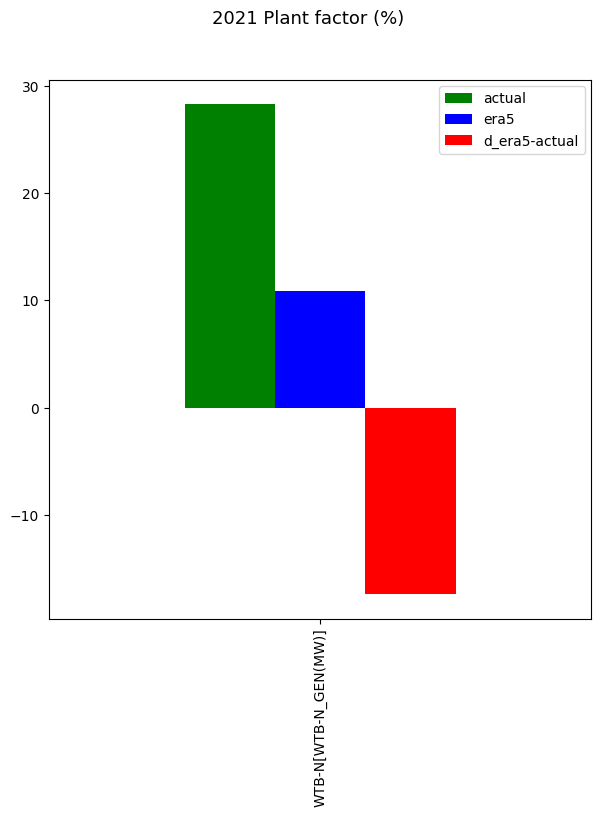

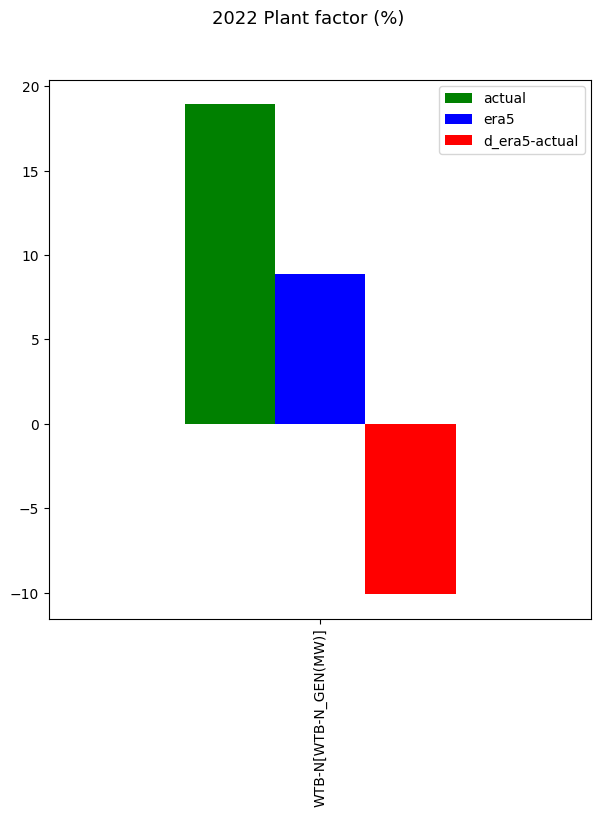

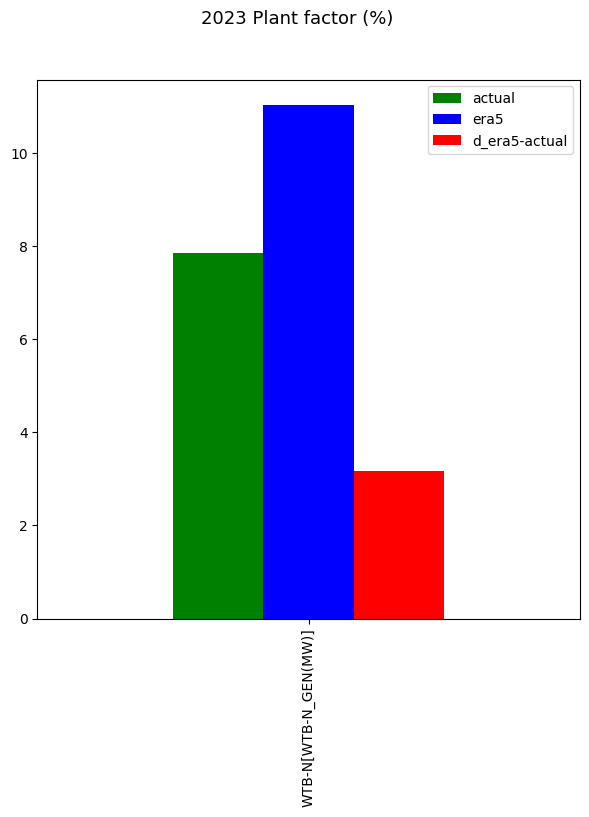

In [6]:
#### Annual Plant factor Comparison ###

year_list = [i for i in range(2021,2024,1)]
name_list = data_actual.columns

for y in year_list:

    buffer_df = df.loc[df.index.year == y]
    buffer_data_actual = data_actual.loc[data_actual.index.year == y]

    buffer_plantfactor = pd.DataFrame(index = name_list,columns=['actual','era5','d_era5-actual'])

    buffer_plantfactor = buffer_plantfactor.set_index(name_list,drop=True)

    for n in name_list:
        buffer_plantfactor['actual'].loc[n] = np.round(buffer_data_actual[n].sum() * 100 /len(buffer_data_actual),4)
        buffer_plantfactor['era5'].loc[n] = np.round(buffer_df[n].sum() * 100 /len(buffer_df),4)
    buffer_plantfactor['d_era5-actual'] = buffer_plantfactor['era5'] - buffer_plantfactor['actual']

    fig, ax = plt.subplots(figsize=(7,7))
    fig.suptitle(str(y) + " Plant factor (%) ", fontsize=13)
    buffer_plantfactor.plot.bar(ax = ax,color=['green','blue','red'])

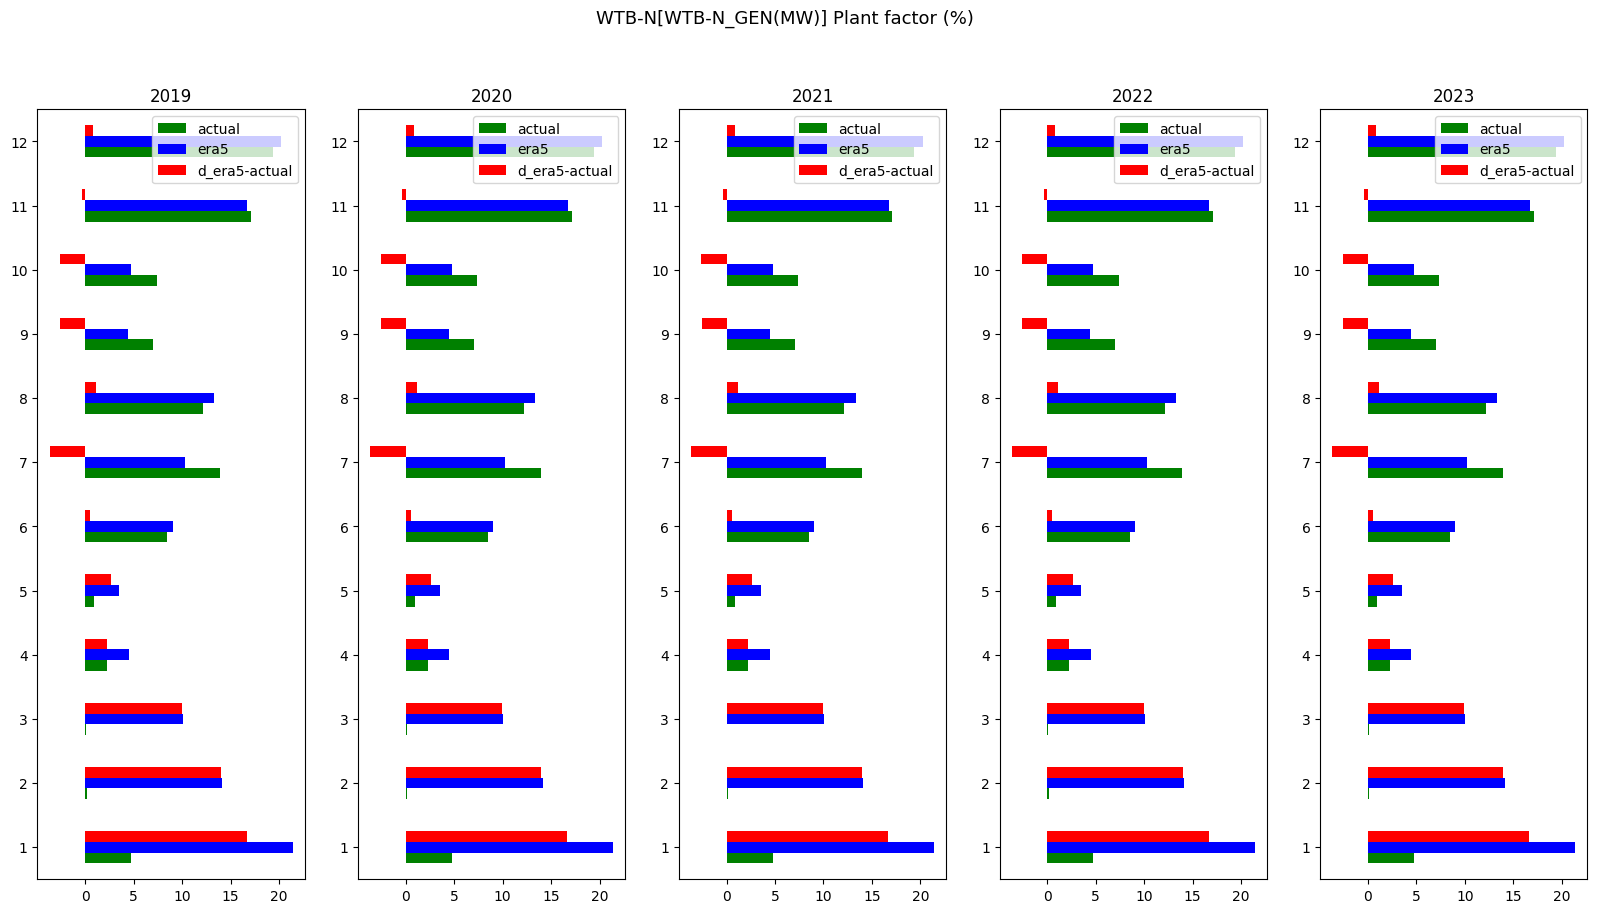

In [7]:
year_list = [i for i in range(2019,2024,1)]
aux_year_list = [i for i in range(len(year_list))]
name_list = data_actual.columns

for n in name_list:
    fig, aux_year_list = plt.subplots(1, len(aux_year_list), figsize=(20, 10))
    fig.suptitle(n + " Plant factor (%) " , fontsize=13)
    # print(buffer_plantfactor)
    for j in range(len(aux_year_list)):
        buffer_plantfactor = pd.DataFrame(index = range(1,13,1),columns=['actual','era5','d_era5-actual'])
        
        buffer_data_actual = data_actual.loc[data_actual.index.year == y]        
        buffer_df = df.loc[df.index.year == y]

        pf_actual_month_list = [100*(buffer_data_actual[n].loc[buffer_data_actual.index.month == (m)].sum()/len(buffer_data_actual.loc[buffer_data_actual.index.month == (m)])) for m in range(1,13,1)]
        pf_era5_month_list = [100*(buffer_df[n].loc[buffer_df.index.month == (m)].sum()/len(buffer_df.loc[buffer_df.index.month == (m)])) for m in range(1,13,1)]

        buffer_plantfactor['actual'] = pf_actual_month_list
        buffer_plantfactor['era5'] = pf_era5_month_list
        buffer_plantfactor['d_era5-actual'] = buffer_plantfactor['era5'] - buffer_plantfactor['actual']

        aux_year_list[j].set_title(year_list[j])
        buffer_plantfactor.plot.barh(ax = aux_year_list[j],color=['green','blue','red'])

      WTB-N[WTB-N_GEN(MW)]
2019                   NaN
2020                   NaN
2021                 0.229
2022                 0.210
2023                 0.095


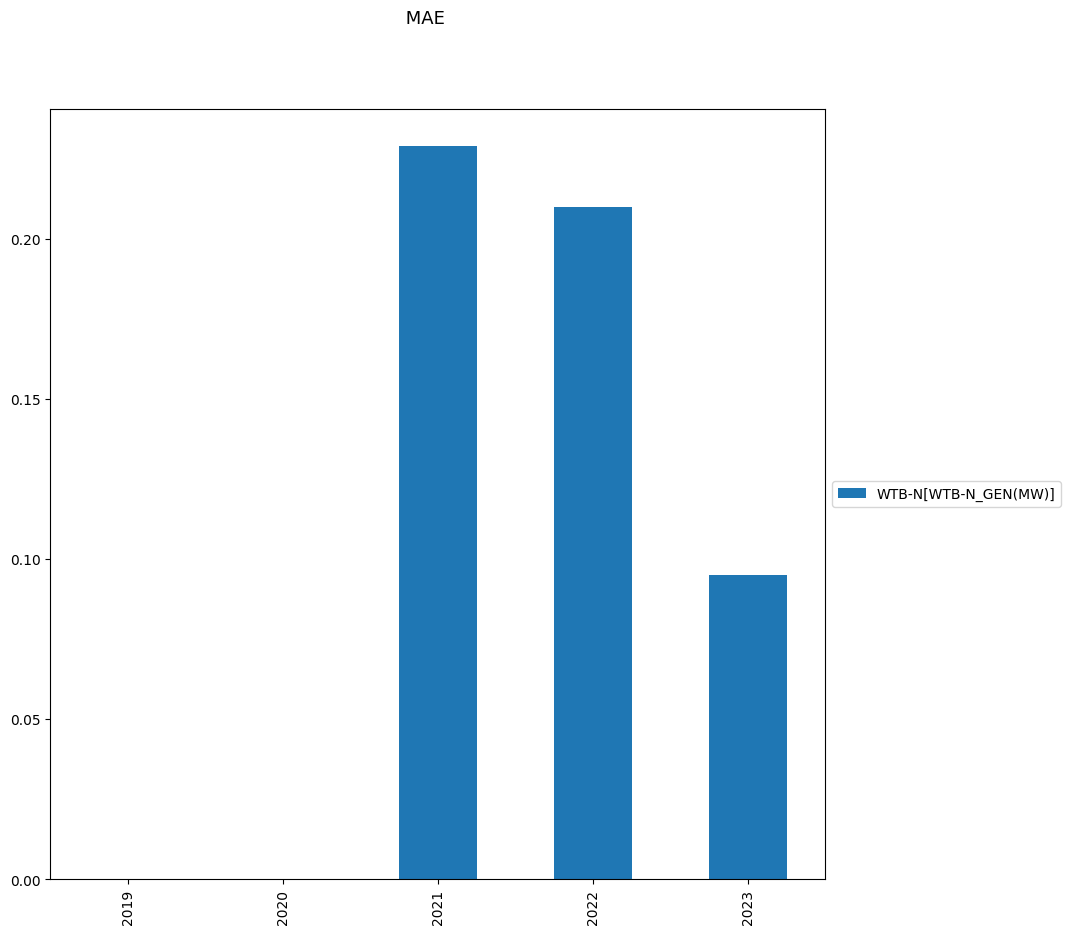

In [8]:
def calc_mae(predic, actual):
    return np.round(np.mean(np.abs((predic - actual))),3)

df_mae = pd.DataFrame(index = [i for i in range(2019,2024,1)],columns=name_list)

for name_index in name_list:
    mae_list = [calc_mae(data_actual[name_index].loc[data_actual.index.year == y].loc[data_actual[name_index] > 0],df[name_index].loc[df.index.year == y].loc[data_actual[name_index] > 0]) for y in year_list]
    df_mae[name_index] = mae_list


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(" MAE ", fontsize=13)
df_mae.plot.bar(ax = ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(df_mae)

In [9]:
print(name_list)

Index(['WTB-N[WTB-N_GEN(MW)]'], dtype='object')


WTB-N[WTB-N_GEN(MW)]


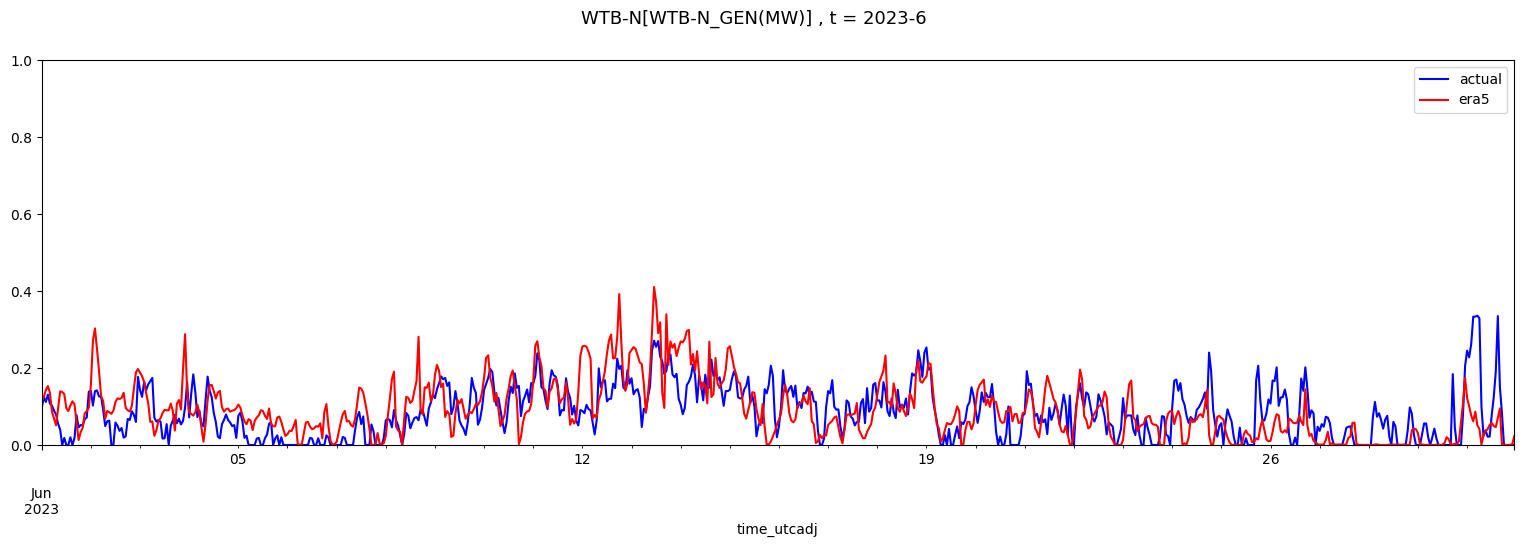

In [16]:
name_index = 0
month = 6
year = 2023
t = str(year) + '-' + str(month)
print(name_list[name_index])

fig, ax = plt.subplots(figsize=(19,5))
fig.suptitle(name_list[name_index] + ' , t = '+ t , fontsize=13)
data_actual[name_list[name_index]].loc[t].plot(ax = ax,color = 'blue', ylim = (0,1))
df[name_list[name_index]].loc[t].plot(ax = ax,color = 'red', ylim = (0,1))
ax.legend(['actual','era5'])